## PyTrends 사용해보기

In [1]:
# 그래프 한글폰트 깨짐 해결 
## 맨 처음에 다른 코드들 실행하기 전에 현재 셀 실행해서 폰트 설치한 뒤 '런타임 다시 시작' 후 
## 현재 셀은 다시 주석 처리해서 실행하지 말고 다음 셀부터 실행하면 됨

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,293 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=b45a65dee8251937ee9d9456c8120fe7cf478db9f5173079b1f5331d5be9b866
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family']='NanumBarunGothic'
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)

import warnings
warnings.filterwarnings("ignore")

# 기본 API 
[pytrends API](https://pypi.org/project/pytrends/#related-topics)

## 클래스 생성
- hl = header language, 사용자가 선호하는 언어
  - hl= 뒤에 작은 따옴표를 이용해서 국가명 또는 언어명을 2단어로 지정 (한국 'KR' or 한국어 'ko', 영국 'UK', 미국 'US', 영어 'en' 등등)
- tz = time zone
  -  전 세계 "표준 시간"에서,  현재 내 지역의 시간이 얼마나 차이가 나는지 분 단위의 숫자 입력 (한국 = 540, 미국 = 360)

In [3]:
from pytrends.request import TrendReq

pytrends=TrendReq(hl='ko', tz=540)

## build_payload
- build_payload를 통해 읽어올 trend data의 속성을 정의
```
cat=0 (all categories)
timeframe='today 5-y' (defaults to last 5yrs)(Specific dates, 'YYYY-MM-DD YYYY-MM-DD')
gprop='' (defaults to web searches)(can be 'images', 'news', 'youtube' or 'froogle')
```
[cat 카테고리 리스트](https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories)

In [12]:
# build_payload를 통해 읽어올 trend data의 속성을 정의
# cat=0 (all categories)
# timeframe='today 5-y' (defaults to last 5yrs)
# gprop='' (defaults to web searches)(can be 'images', 'news', 'youtube' or 'froogle')

keyword="카카오뱅크"
pytrends.build_payload([keyword], cat=0, timeframe='today 5-y', geo='', gprop='') 

## Interest Over Time 

In [13]:
pytrends.interest_over_time()

,카카오뱅크,isPartial
date,,
2017-08-27,35,False
2017-09-03,26,False
2017-09-10,25,False
2017-09-17,23,False
2017-09-24,20,False
...,...,...
2022-07-17,25,False
2022-07-24,30,False
2022-07-31,30,False


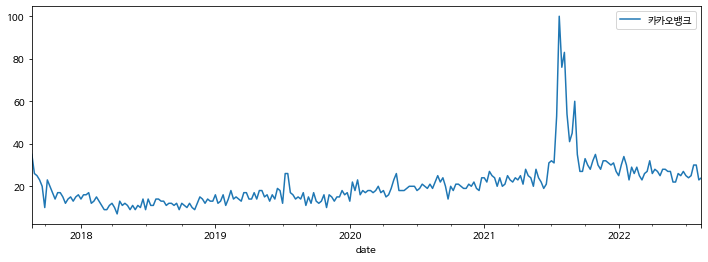

In [14]:
pytrends.interest_over_time().plot(figsize=(12,4))
plt.show()

## Related Topics 

In [15]:
pytrends.related_topics()

{'카카오뱅크': {'rising':      value formattedValue                                            link  \
  0   142750             급등       /trends/explore?q=/m/04vf8&date=today+5-y   
  1   137700             급등     /trends/explore?q=/m/046d80l&date=today+5-y   
  2   120300             급등     /trends/explore?q=/m/0zmyfm2&date=today+5-y   
  3   116550             급등     /trends/explore?q=/m/03qdcry&date=today+5-y   
  4   112650             급등  /trends/explore?q=/g/11bc6rlt4t&date=today+5-y   
  5   103650             급등      /trends/explore?q=/m/021dfr&date=today+5-y   
  6   100850             급등       /trends/explore?q=/m/0g_fl&date=today+5-y   
  7    89800             급등    /trends/explore?q=/g/12168nfk&date=today+5-y   
  8    76200             급등      /trends/explore?q=/m/02_ssl&date=today+5-y   
  9    63350             급등       /trends/explore?q=/m/056cc&date=today+5-y   
  10   56500             급등     /trends/explore?q=/m/0j_6n11&date=today+5-y   
  11   54450             급등      

In [16]:
pytrends.related_topics().keys()

dict_keys(['카카오뱅크'])

In [17]:
pytrends.related_topics()[keyword].keys() 

dict_keys(['rising', 'top'])

In [18]:
pytrends.related_topics()[keyword]['rising']

,value,formattedValue,link,topic_mid,topic_title,topic_type
0,142750,급등,/trends/explore?q=/m/04vf8&date=today+5-y,/m/04vf8,사본,주제
1,137700,급등,/trends/explore?q=/m/046d80l&date=today+5-y,/m/046d80l,Mini,BMW
2,120300,급등,/trends/explore?q=/m/0zmyfm2&date=today+5-y,/m/0zmyfm2,NH농협은행,주제
3,116550,급등,/trends/explore?q=/m/03qdcry&date=today+5-y,/m/03qdcry,교통카드,주제
4,112650,급등,/trends/explore?q=/g/11bc6rlt4t&date=today+5-y,/g/11bc6rlt4t,공동인증서,주제
5,103650,급등,/trends/explore?q=/m/021dfr&date=today+5-y,/m/021dfr,청년,주제
6,100850,급등,/trends/explore?q=/m/0g_fl&date=today+5-y,/m/0g_fl,투자,주제
7,89800,급등,/trends/explore?q=/g/12168nfk&date=today+5-y,/g/12168nfk,공인인증서,주제
8,76200,급등,/trends/explore?q=/m/02_ssl&date=today+5-y,/m/02_ssl,센터,농구
9,63350,급등,/trends/explore?q=/m/056cc&date=today+5-y,/m/056cc,모임,집합론


In [19]:
pytrends.related_topics()[keyword]['top']

,value,formattedValue,hasData,link,topic_mid,topic_title,topic_type
0,100,100,True,/trends/explore?q=/g/11d_w61nl6&date=today+5-y,/g/11d_w61nl6,카카오뱅크,은행
1,94,94,True,/trends/explore?q=/m/017ql&date=today+5-y,/m/017ql,은행,주제
2,11,11,True,/trends/explore?q=/m/0131zpg8&date=today+5-y,/m/0131zpg8,카카오,기업
3,9,9,True,/trends/explore?q=/m/03jzl9&date=today+5-y,/m/03jzl9,주식,주제
4,7,7,True,/trends/explore?q=/m/01xm4b&date=today+5-y,/m/01xm4b,주가,주제
5,5,5,True,/trends/explore?q=/m/04k_lf&date=today+5-y,/m/04k_lf,통장,주제
6,4,4,True,/trends/explore?q=/m/02p267r&date=today+5-y,/m/02p267r,체크카드,주제
7,4,4,True,/trends/explore?q=/g/11h9_b91y3&date=today+5-y,/g/11h9_b91y3,카카오페이,주제
8,3,3,True,/trends/explore?q=/m/08f4gj&date=today+5-y,/m/08f4gj,송금,주제
9,3,3,True,/trends/explore?q=/m/09dqvb&date=today+5-y,/m/09dqvb,네이버 주식회사,기업
